##Inporting all the necessay libraries -

Here we import all essential libraries for data manipulation, numerical computations, data visualization, and machine learning tasks. **Pandas** is used for data manipulation, **NumPy** for numerical operations, and Seaborn along with **Matplotlib** for visualization. **Scikit-learn modules** like TfidfVectorizer are employed for text feature extraction, **LabelEncoder** for encoding categorical variables, and **LinearSVC** for Support Vector Machine classification. Additionally, it includes functionalities for data splitting using train_test_split and model evaluation using accuracy_score and classification_report.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

## Importing the dataset

Below we are reaing three separate datasets: train data, test data, and test solution data, from text files. Each dataset consists of columns 'ID', 'TITLE', 'GENRE', and 'DESCRIPTION', with ':::' as the delimiter. The display() function is used to show the first few rows of each dataset, and print() displays the shape of each DataFrame.


In [15]:
train_df = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_df = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_solution_df = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

display(train_df.head())
display(test_df.head())
display(test_solution_df.head())


print(train_df.shape)
print(test_df.shape)
print(test_solution_df.shape)

<ipython-input-15-d87104b9ebbf>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
<ipython-input-15-d87104b9ebbf>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
<ipython-input-15-d87104b9ebbf>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specif

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54214, 4)
(54200, 4)
(54200, 4)


##Executing visualization techniques on the data

Here we are creating a horizontal bar plot using Seaborn's countplot function to visualize the distribution of movie genres in the training dataset (train_df). The genres are sorted based on their frequency in descending order (order=train_df['GENRE'].value_counts().index). The plot is displayed with a specified figure size of 20x8 inches (plt.figure(figsize=(20,8))). The title of the plot is set as "Count of Movies by Genre", with the x-axis labeled as "Count of Movies" and the y-axis labeled as "Genre".


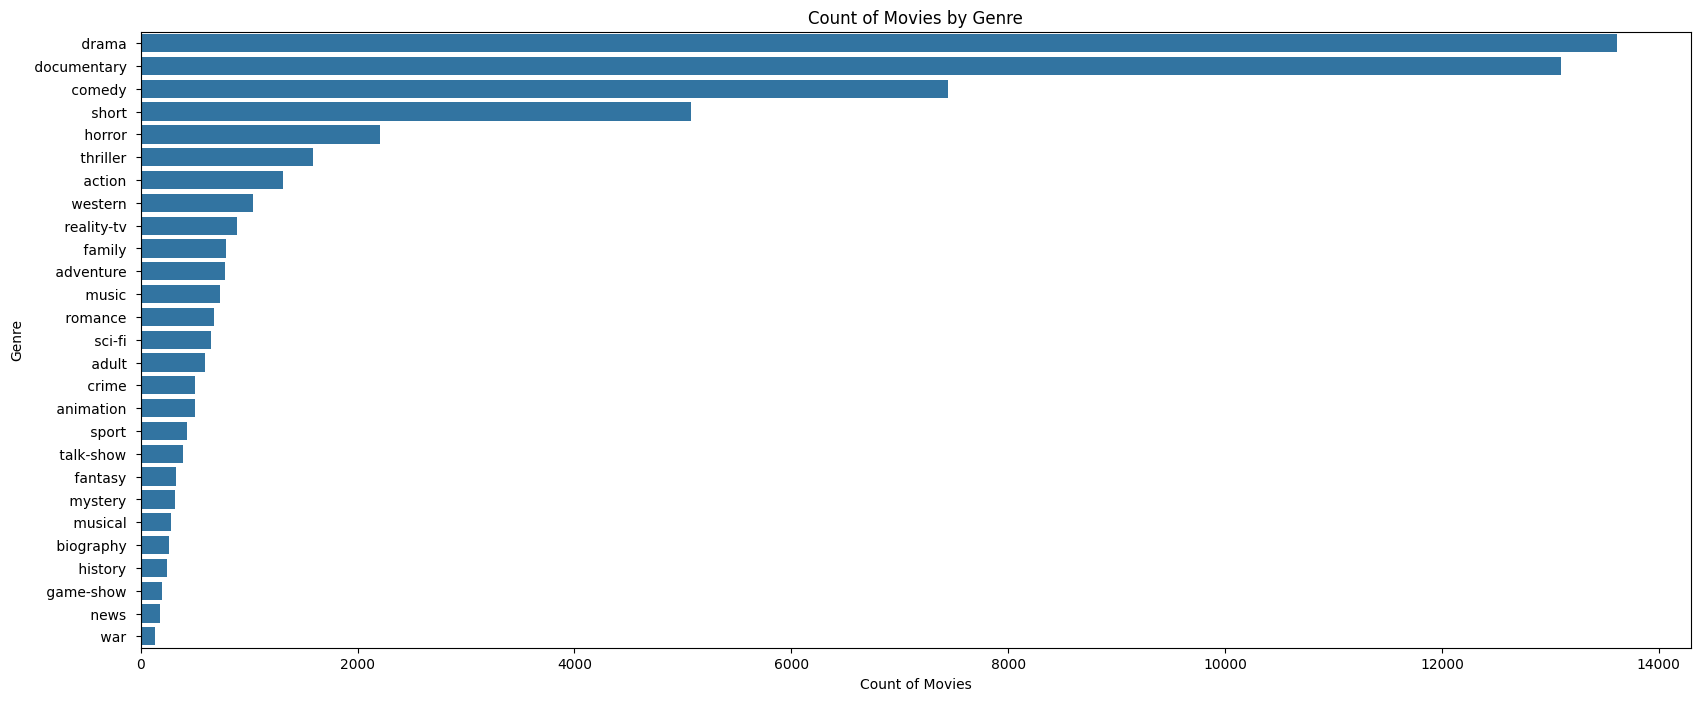

In [16]:
plt.figure(figsize=(20, 8))
sns.countplot(y=train_df['GENRE'], order=train_df['GENRE'].value_counts().index)
plt.title('Count of Movies by Genre')
plt.xlabel('Count of Movies')
plt.ylabel('Genre')
plt.show()

##Bar representation illustrating the relationship between genre and description length.

Here we are computing the length of each description in the 'DESCRIPTION' column of the 'train_df' DataFrame, saving the results in a new column named 'Desc_Length'. It then generates a bar plot using Seaborn's 'barplot' function, with movie genres ('GENRE') on the x-axis and their respective description lengths on the y-axis. The plot is titled "Genre vs Description Length", with labels "Genre" for the x-axis and "Description Length" for the y-axis. The 'xticks' function rotates the genre labels by 45 degrees for better legibility, facilitating an understanding of the relationship between movie genres and description lengths.


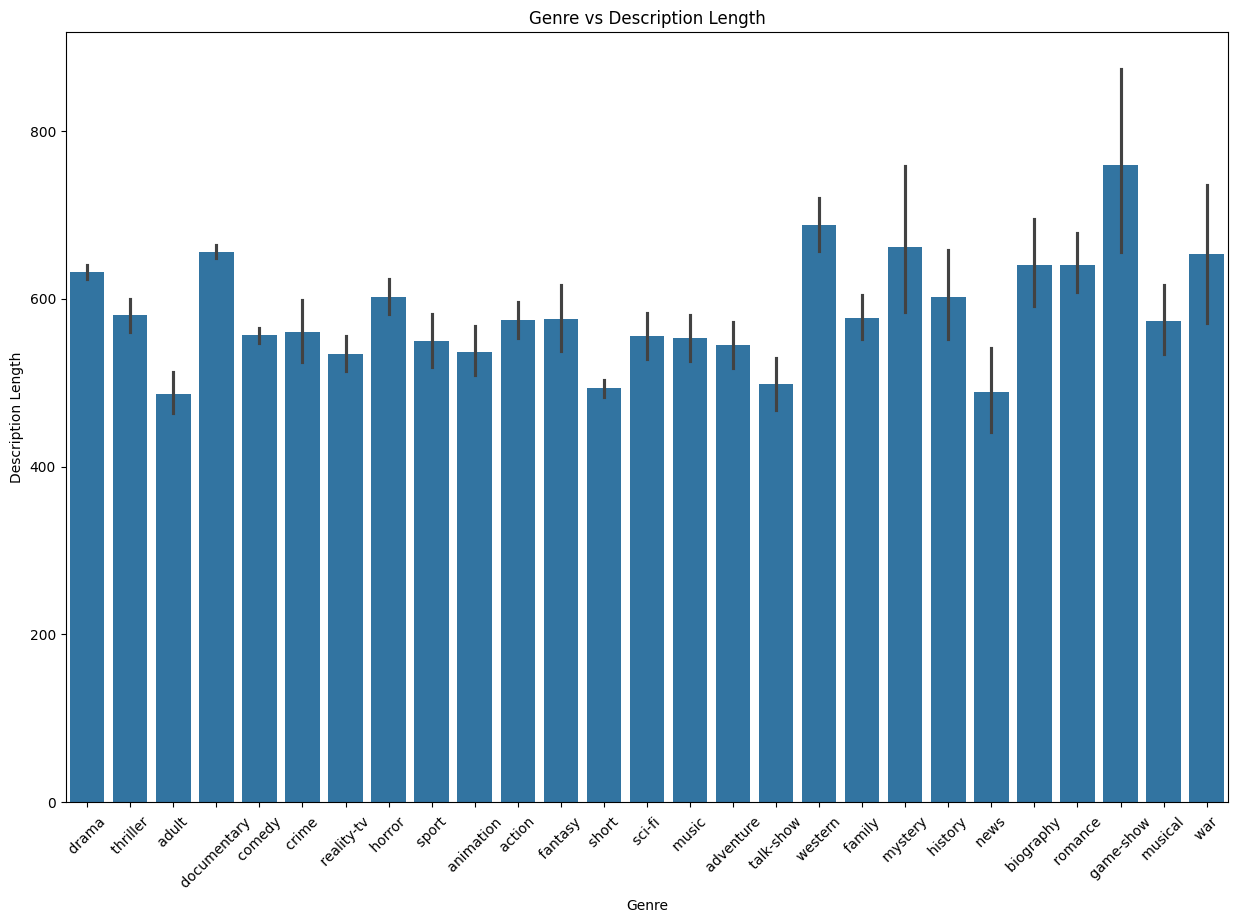

In [17]:
train_df['Desc_Length'] = train_df['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='Desc_Length', data=train_df)
plt.title('Genre vs Description Length')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()


## To know which genre is the most popular among viewers.

Here we are calculating the frequency of each genre in the 'GENRE' column of the 'train_df' DataFrame and selects the top 10 most popular genres. It then creates a horizontal bar plot using Matplotlib's 'barh' function, with the number of movies on the x-axis and genres on the y-axis. The plot is titled "Top 10 Most Popular Genres" and the bars are colored blue. The y-axis is inverted to display the genre with the highest frequency at the top.

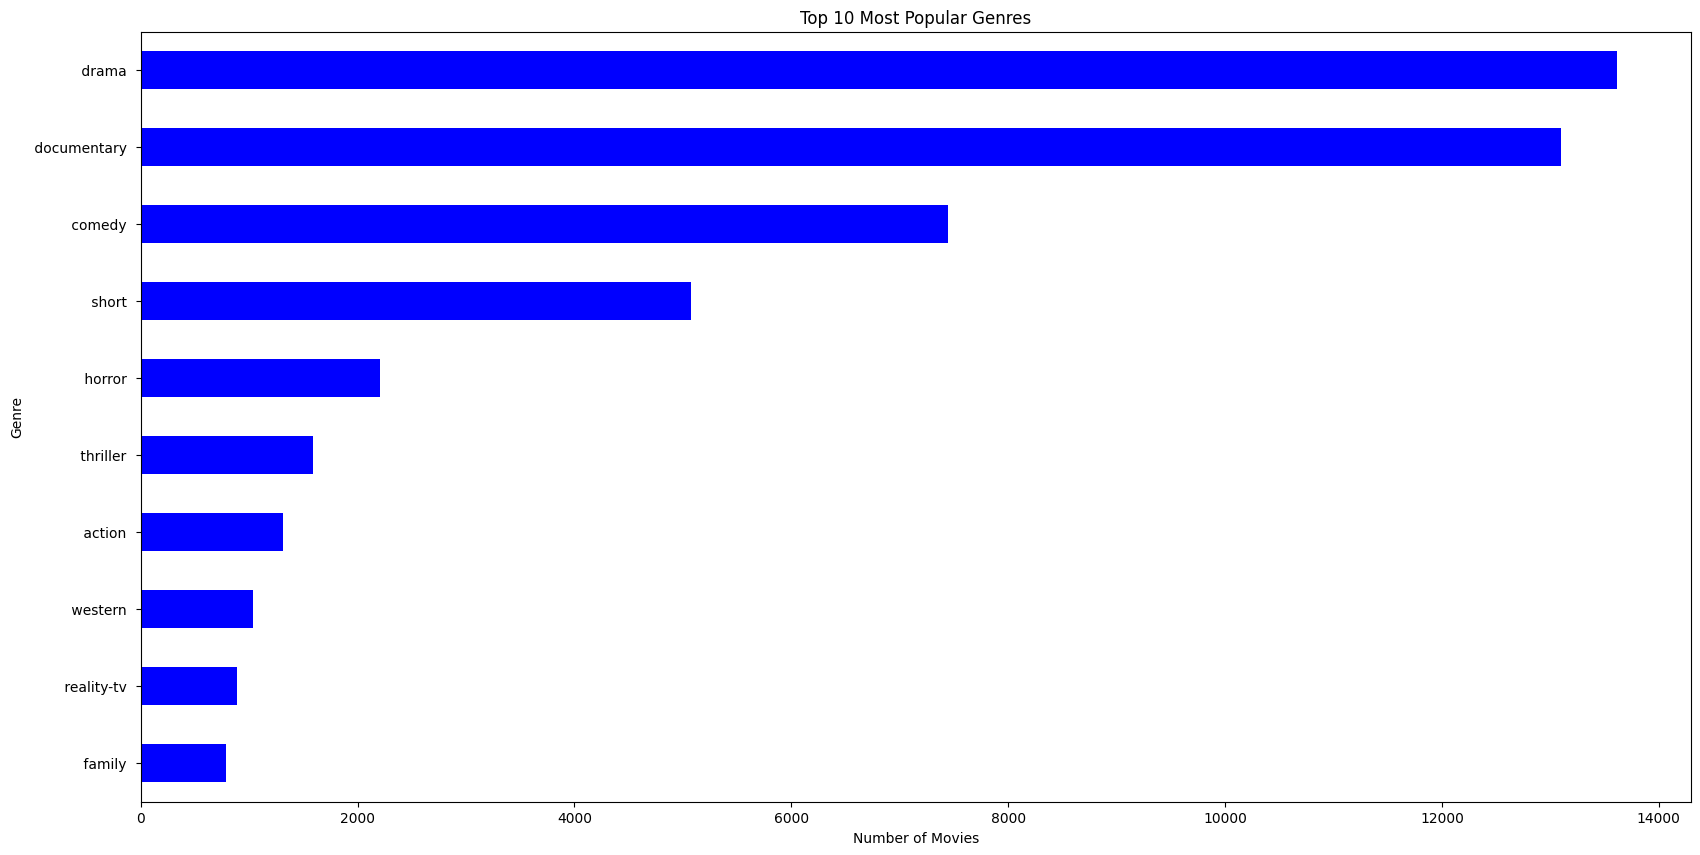

In [18]:
popular_genres = train_df['GENRE'].value_counts().head(10)
plt.figure(figsize=(20, 10))
popular_genres.plot(kind='barh', color='blue')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

## Training and Testing the dataset



In [19]:
train_df['DESCRIPTION'].fillna("", inplace=True)
test_df['DESCRIPTION'].fillna("", inplace=True)
vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = vectorizer.fit_transform(train_df['DESCRIPTION'])
X_test = vectorizer.transform(test_df['DESCRIPTION'])
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['GENRE'])
y_test = label_encoder.transform(test_solution_df['GENRE'])
X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = LinearSVC()
model.fit(X_train_sub, y_train_sub)
y_validation_pred = model.predict(X_validation)
print("Accuracy on Validation Set:", accuracy_score(y_validation, y_validation_pred))
print("Classification Report on Validation Set:\n", classification_report(y_validation, y_validation_pred))

Accuracy on Validation Set: 0.5836945494789265
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07   

In [20]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)


MultinomialNB()

In [24]:
mnb.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [26]:
lr.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [27]:
def predict_genre(description):
    transformed_description = vectorizer.transform([description])
    predicted_genre = model.predict(transformed_description)
    predicted_genre = label_encoder.inverse_transform(predicted_genre)

    return predicted_genre[0]

sample_description1 = "A movie where police cashes the criminal and shoot him"
print(predict_genre(sample_description1))

sample_description2 = "A movie where person cashes a girl too get marry with him but girl refuses him."
print(predict_genre(sample_description2))


 action 
 drama 
